In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
file_path = r"C:\Users\user\OneDrive\NareshIT\DataScience\EDA\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Categorical-vs-Categorical**

In [2]:
visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [3]:
con1 = visa_df['continent']=='Asia'
con2 = visa_df['case_status']== 'Certified'
con=con1&con2
len(visa_df[con])

11012

In [4]:
con=visa_df[(visa_df['continent']=='Asia')&visa_df['case_status']=='Certified']

In [5]:
con1 = visa_df['continent']=='Asia'
con2 = visa_df['case_status']== 'Certified'
con3 = visa_df['case_status']== 'Denied'
corti_con=con1&con2
denied_con = con1&con3
got_visa = len(visa_df[corti_con])
reject_visa = len(visa_df[denied_con])
print(f'No of asia people got visa {got_visa}')
print(f'No of asia people got visa {reject_visa}')

No of asia people got visa 11012
No of asia people got visa 5849


In [20]:
lables = visa_df['continent'].value_counts().keys()
cert = []
den = []
for i in lables:
    con1 = visa_df['continent']==i
    con2 = visa_df['case_status']== 'Certified'
    con3 = visa_df['case_status']== 'Denied'
    corti_con=con1&con2
    denied_con = con1&con3
    got_visa = len(visa_df[corti_con])
    reject_visa = len(visa_df[denied_con])
    cert.append(got_visa)
    den.append(reject_visa)
    
print(f'No of people got visa {cert}')
print(f'No of people dined visa {den}')
df1 = pd.DataFrame(zip(lables, cert,den), columns=['contients', 'Certified', 'Denied'])
df1.set_index('contients')

No of people got visa [11012, 2957, 2037, 493, 397, 122]
No of people dined visa [5849, 775, 1255, 359, 154, 70]


,Certified,Denied
contients,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


In [6]:
col1=visa_df['continent']
col2=visa_df['case_status']
result1 = pd.crosstab(col1, col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

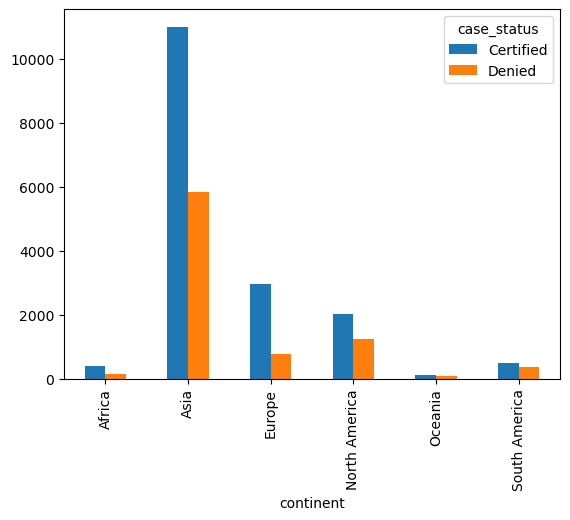

In [7]:
result1.plot(kind='bar')

In [3]:
col1=visa_df['continent']
col2=[visa_df['case_status'], visa_df['education_of_employee']]
result1 = pd.crosstab(col1, col2)


KeyError: 'contients'

$Numerical Vs Numarical$

$Scatter$ $plots$
   - plt.scatter
    
   - Will take two arguments x axis and y-axis
    
   - Both variables should be numrical
    
   - It provide relation ship between two variable
    
     - positively related
        
     - Negatively related
        
     - No realation

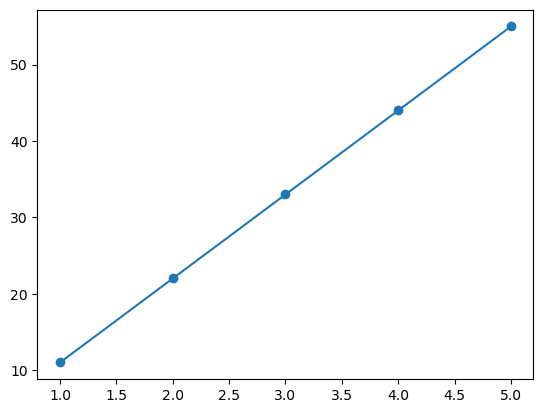

In [14]:
x=[1,2,3,4,5]
y=[11,22,33,44,55]
plt.scatter(x,y)
plt.plot(x,y)

In [17]:
x= [i for i in range(-4, 5)]
y= [i*i for i in in range(-4, 5)]
plt.scatter(x,y)
plt.plot(x,y)

SyntaxError: invalid syntax (1522388565.py, line 2)

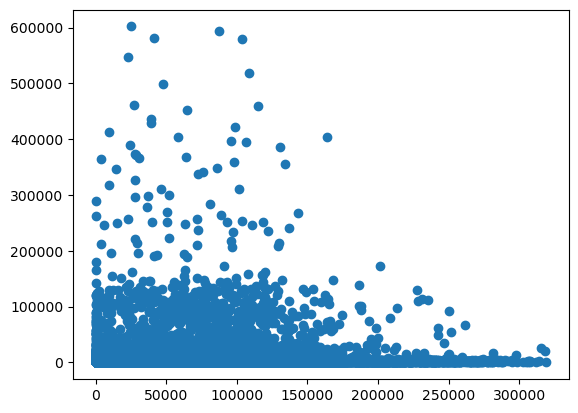

In [22]:
col1=visa_df['prevailing_wage']
col2=visa_df['no_of_employees']
plt.scatter(col1,col2)
#plt.plot(col1,col2)     

In [ ]:
$Correlation-Coeflecient$
    
    - Denoted with r
    
    - Prearson correlation coefficient
    
    -
    

In [25]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


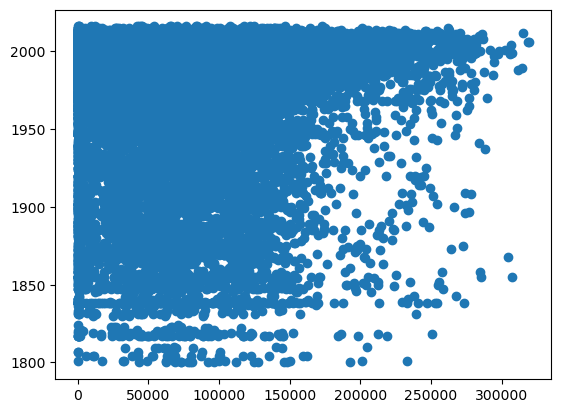

In [26]:
col1=visa_df['prevailing_wage']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)
#plt.plot(col1,col2) 

In [ ]:
file_path = r"C:\Users\user\OneDrive\NareshIT\DataScience\EDA\Visadataset.csv"
visa_df = pd.read_csv(file_path)
visa_df

$Heatmap$

<Axes: >

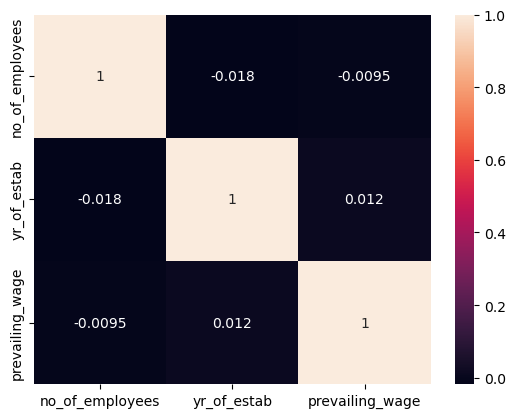

In [30]:
corr = visa_df.corr(numeric_only=True)
sbn.heatmap(corr, annot=True)